In [11]:
# 导入所有必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置可视化风格
sns.set(style="whitegrid")

# 加载所有数据集
try:
    customers = pd.read_csv('olist_customers_dataset.csv')
    geolocation = pd.read_csv('olist_geolocation_dataset.csv')
    order_items = pd.read_csv('olist_order_items_dataset.csv')
    order_payments = pd.read_csv('olist_order_payments_dataset.csv')
    order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
    orders = pd.read_csv('olist_orders_dataset.csv')
    products = pd.read_csv('olist_products_dataset.csv')
    sellers = pd.read_csv('olist_sellers_dataset.csv')
    product_category_name_translation = pd.read_csv('product_category_name_translation.csv')
except FileNotFoundError as e:
    print(f"错误: {e}。请确保CSV文件与此Notebook位于同一目录中。")

# 打印每个数据集的头部信息和基本信息，以了解其结构
datasets = {
    'customers': customers,
    'geolocation': geolocation,
    'order_items': order_items,
    'order_payments': order_payments,
    'order_reviews': order_reviews,
    'orders': orders,
    'products': products,
    'sellers': sellers,
    'product_category_name_translation': product_category_name_translation
}

for name, df in datasets.items():
    print(f"--- {name} ---")
    print(df.head())
    print(df.info())
    print("\n")

--- customers ---
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                

In [12]:
# --------------------
# 2.1 合并数据集
# --------------------
# 将所有相关数据集合并到一个名为 'df' 的主数据框中
df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, order_reviews, on='order_id', how='left')
df = pd.merge(df, order_payments, on='order_id', how='left')
df = pd.merge(df, order_items, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, sellers, on='seller_id', how='left')
df = pd.merge(df, product_category_name_translation, on='product_category_name', how='left')

print("数据合并完成。合并后数据框的形状:", df.shape)

# --------------------
# 2.2 数据清洗
# --------------------
# 检查缺失值
print("\n合并后各列的缺失值数量:")
print(df.isnull().sum())

# 为了简化模型，我们选择删除包含缺失值的行
df.dropna(inplace=True)
print("\n删除缺失值后数据框的形状:", df.shape)

# 转换时间格式，以便进行时间相关的计算
print("\n转换时间相关列的数据类型...")
time_cols = [
    'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date',
    'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date'
]
for col in time_cols:
    df[col] = pd.to_datetime(df[col])

print("数据清洗和类型转换完成。")
df.info()

数据合并完成。合并后数据框的形状: (119151, 40)

合并后各列的缺失值数量:
order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             104962
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
order_item_id                       833
product_id                         

C:\Users\qlf04\AppData\Local\Temp\ipykernel_24636\4019801746.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=df, palette='viridis')


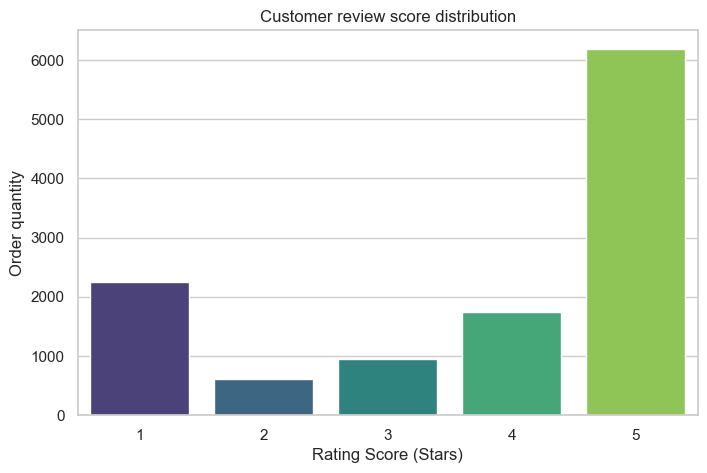

C:\Users\qlf04\AppData\Local\Temp\ipykernel_24636\4019801746.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='payment_type', data=df, order=df['payment_type'].value_counts().index, palette='magma')


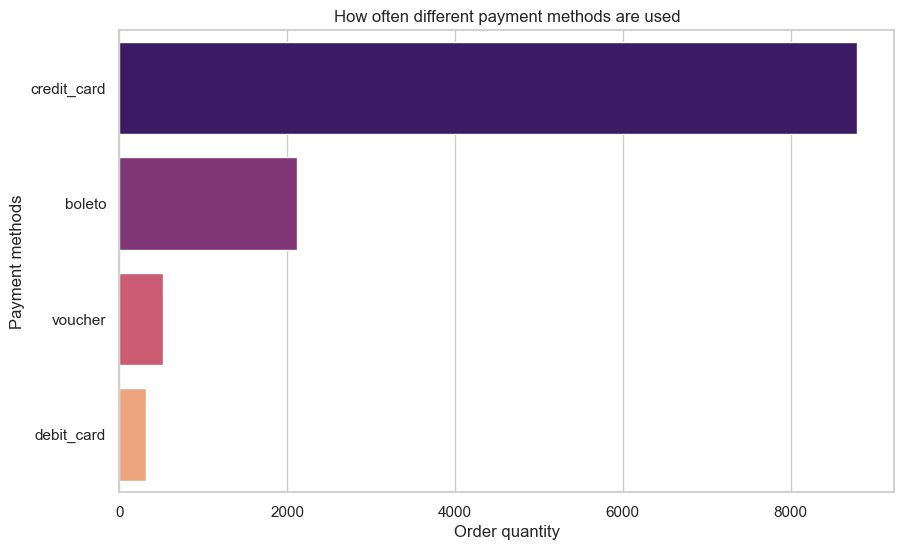

In [13]:
# --------------------
# 3.1 目标变量分析：评价分数分布
# --------------------
plt.figure(figsize=(8, 5))
sns.countplot(x='review_score', data=df, palette='viridis')
plt.title('Customer review score distribution')
plt.xlabel('Rating Score (Stars)')
plt.ylabel('Order quantity')
plt.show()

# --------------------
# 3.2 不同支付方式的欢迎程度
# --------------------
plt.figure(figsize=(10, 6))
sns.countplot(y='payment_type', data=df, order=df['payment_type'].value_counts().index, palette='magma')
plt.title('How often different payment methods are used')
plt.xlabel('Order quantity')
plt.ylabel('Payment methods')
plt.show()

In [14]:
print("开始进行高级特征工程...")

print("正在创建基础衍生特征 (processing_time, delivery_time_diff)...")

# 从下单到发货的处理时间（小时）
df['processing_time'] = (df['order_delivered_carrier_date'] - df['order_purchase_timestamp']).dt.total_seconds() / 3600

# 实际送达与预计送达的时间差（天）
df['delivery_time_diff'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

# 订单总价值
df['total_order_value'] = df['price'] + df['freight_value']

# 创建目标变量
df['satisfaction'] = df['review_score'].apply(lambda x: 1 if x <= 2 else 0)

# 卖家响应评论的时间（小时）
df['review_response_time'] = (df['review_answer_timestamp'] - df['review_creation_date']).dt.total_seconds() / 3600

print("基础衍生特征创建完成。")

# --- 1. 时间维度 (Temporal Features) ---
print("正在创建时间特征...")
df['order_purchase_weekday'] = df['order_purchase_timestamp'].dt.dayofweek # 0=周一, 6=周日
df['order_purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.month
# 创建一个简单的“工作时间下单”特征 (假设周一到周五，9点到18点为工作时间)
df['is_business_hour'] = (
    (df['order_purchase_weekday'].isin([0,1,2,3,4])) &
    (df['order_purchase_hour'].between(9, 18))
).astype(int)


# --- 2. 空间维度 (Geospatial Features) ---
# 计算买家与卖家之间的物理距离
# 由于一个邮编可能对应多个经纬度，我们先计算每个邮编的平均经纬度
print("正在创建地理空间特征...")
geolocation_agg = geolocation.groupby('geolocation_zip_code_prefix').agg(
    lat=('geolocation_lat', 'mean'),
    lon=('geolocation_lng', 'mean')
).reset_index()

# 将经纬度信息合并到主数据框
df = pd.merge(df, geolocation_agg, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
df.rename(columns={'lat': 'customer_lat', 'lon': 'customer_lon'}, inplace=True)
df.drop('geolocation_zip_code_prefix', axis=1, inplace=True)

df = pd.merge(df, geolocation_agg, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
df.rename(columns={'lat': 'seller_lat', 'lon': 'seller_lon'}, inplace=True)
df.drop('geolocation_zip_code_prefix', axis=1, inplace=True)

# 定义计算Haversine距离的函数 (地球上两点间的距离)
from numpy import radians, sin, cos, arcsin, sqrt
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # 地球半径，单位公里
    # 处理可能存在的缺失值
    if pd.isna(lat1) or pd.isna(lon1) or pd.isna(lat2) or pd.isna(lon2):
        return np.nan

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a))
    return R * c

# 应用函数计算距离
df['distance_km'] = df.apply(
    lambda row: haversine_distance(row['customer_lat'], row['customer_lon'], row['seller_lat'], row['seller_lon']),
    axis=1
)

# --- 3. 文本挖掘 (Text Features - NLP) ---
# 需要先安装: pip install textblob
from textblob import TextBlob
print("正在创建文本情感特征...")

# 填充评论缺失值，防止错误
df['review_comment_message'].fillna('', inplace=True)

# 定义获取情感极性的函数
def get_sentiment_polarity(text):
    if not isinstance(text, str) or text.strip() == '':
        return 0  # 如果没有评论，情感为中性
    return TextBlob(text).sentiment.polarity # 范围[-1, 1], 负数为负面, 正数为正面

# 应用函数
df['review_sentiment_polarity'] = df['review_comment_message'].apply(get_sentiment_polarity)
df['review_comment_length'] = df['review_comment_message'].apply(len)


# --- 4. 卖家维度 (Seller Features) ---
print("正在创建卖家历史表现特征...")
seller_stats = df.groupby('seller_id').agg(
    seller_avg_rating=('review_score', 'mean'),
    seller_review_count=('review_score', 'count'),
    seller_avg_freight=('freight_value', 'mean'),
    # 计算卖家的平均发货时长 (我们之前创建的 processing_time)
    seller_avg_processing_time=('processing_time', 'mean')
).reset_index()

# 将卖家统计数据合并回主数据框
df = pd.merge(df, seller_stats, on='seller_id', how='left')


# --- 5. 清理新特征产生的缺失值 ---
# 地理距离和卖家特征可能会因为信息不全产生少量NaN，用中位数填充
new_features_with_na = ['distance_km', 'seller_avg_rating', 'seller_review_count', 'seller_avg_freight', 'seller_avg_processing_time', 'customer_lat', 'customer_lon', 'seller_lat', 'seller_lon']
for col in new_features_with_na:
    if col in df.columns and df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("高级特征工程完成！")

features_advanced = [
    # 原始数值特征
    'payment_installments', 'payment_value', 'price', 'freight_value',
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',

    # 之前创建的有效特征
    'delivery_time_diff', 'processing_time', 'review_response_time',
    'total_order_value',

    # 1. 新增时间特征
    'order_purchase_weekday', 'order_purchase_hour', 'is_business_hour',

    # 2. 新增空间特征
    'distance_km',

    # 3. 新增文本特征
    'review_sentiment_polarity', 'review_comment_length',

    # 4. 新增卖家特征
    'seller_avg_rating', 'seller_review_count', 'seller_avg_freight', 'seller_avg_processing_time'
]

target = 'satisfaction'

X_advanced = df[features_advanced]
y = df[target]

print("\n--- 全新特征集预览 ---")
print(X_advanced.head())
print("\n--- 新特征集信息 ---")
X_advanced.info()

开始进行高级特征工程...
正在创建基础衍生特征 (processing_time, delivery_time_diff)...
基础衍生特征创建完成。
正在创建时间特征...
正在创建地理空间特征...
正在创建文本情感特征...


C:\Users\qlf04\AppData\Local\Temp\ipykernel_24636\338782790.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_comment_message'].fillna('', inplace=True)


正在创建卖家历史表现特征...
高级特征工程完成！

--- 全新特征集预览 ---
   payment_installments  payment_value  price  freight_value  \
0                   1.0         141.46  118.7          22.76   
1                  10.0         146.45  132.4          14.05   
2                   1.0         104.11   89.9          14.21   
3                  10.0         227.68   90.9          48.64   
4                  10.0         227.68   39.5          48.64   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 29.0                       178.0                 1.0   
1                 39.0                       991.0                 3.0   
2                 56.0                       115.0                 1.0   
3                 53.0                       233.0                 1.0   
4                 52.0                       300.0                 1.0   

   delivery_time_diff  processing_time  review_response_time  ...  \
0                   5        41.823056             18.6305

C:\Users\qlf04\AppData\Local\Temp\ipykernel_24636\338782790.py:118: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


训练集大小: (8807, 21)
测试集大小: (2936, 21)

开始训练模型...
模型训练完成。

模型在测试集上的准确率: 0.8798

分类报告:
              precision    recall  f1-score   support

      满意 (0)       0.89      0.96      0.92      2222
     不满意 (1)       0.84      0.62      0.72       714

    accuracy                           0.88      2936
   macro avg       0.86      0.79      0.82      2936
weighted avg       0.88      0.88      0.87      2936


混淆矩阵:


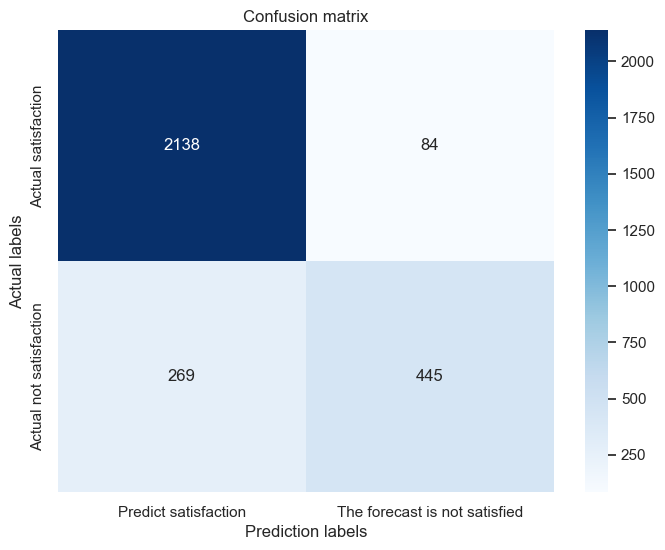

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------
# 5.1 划分数据集
# --------------------
# stratify=y 确保训练集和测试集中，满意和不满意的样本比例与原始数据一致
X_train, X_test, y_train, y_test = train_test_split(X_advanced, y, test_size=0.25, random_state=42, stratify=y)

print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")

# --------------------
# 5.2 训练随机森林模型
# --------------------
# class_weight='balanced' 用于处理类别不平衡问题
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

print("\n开始训练模型...")
rf_model.fit(X_train, y_train)
print("模型训练完成。")

# --------------------
# 5.3 在测试集上进行预测与评估
# --------------------
y_pred = rf_model.predict(X_test)

# 打印准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"\n模型在测试集上的准确率: {accuracy:.4f}")

# 打印分类报告，包含精确率、召回率和F1分数
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=['满意 (0)', '不满意 (1)']))

# 绘制混淆矩阵
print("\n混淆矩阵:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predict satisfaction', 'The forecast is not satisfied'],
            yticklabels=['Actual satisfaction', 'Actual not satisfaction'])
plt.title('Confusion matrix')
plt.ylabel('Actual labels')
plt.xlabel('Prediction labels')
plt.show()

C:\Users\qlf04\AppData\Local\Temp\ipykernel_24636\1505956944.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette='rocket')
E:\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
E:\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
E:\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
E:\conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24471 (\N{CJK U

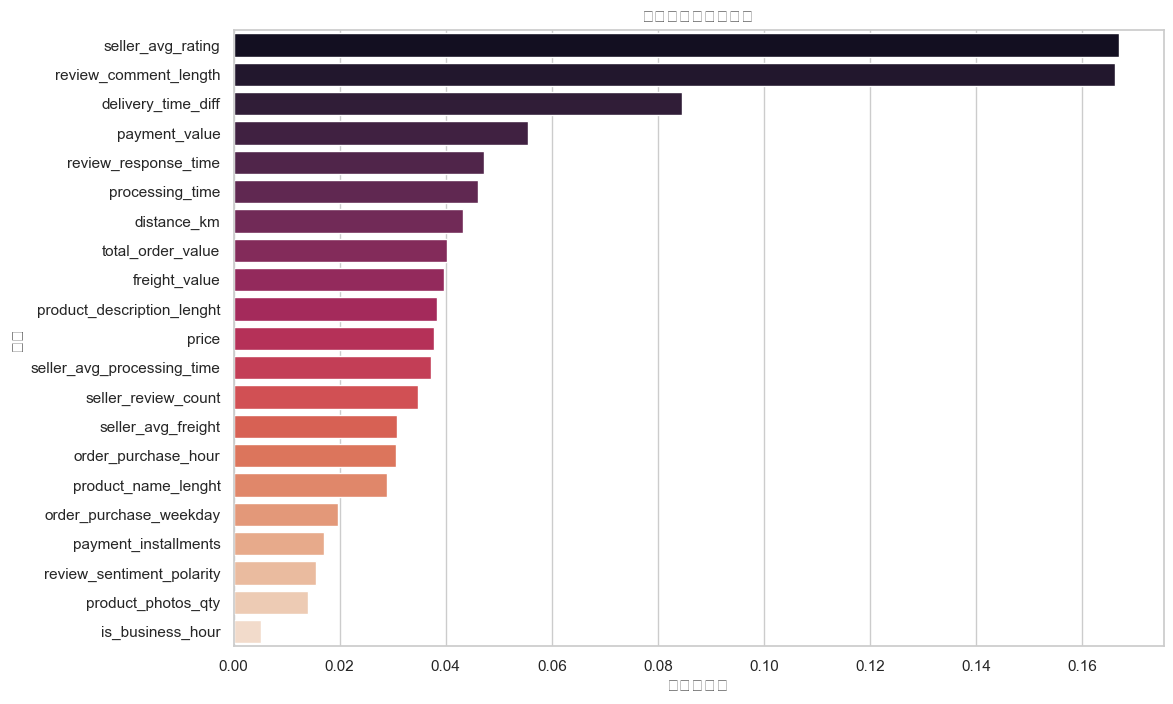


--- Top 10 重要特征 ---
                            importance
seller_avg_rating             0.167020
review_comment_length         0.166221
delivery_time_diff            0.084620
payment_value                 0.055458
review_response_time          0.047160
processing_time               0.046144
distance_km                   0.043346
total_order_value             0.040219
freight_value                 0.039645
product_description_lenght    0.038345


In [16]:
# --------------------
# 6.1 获取并可视化特征重要性
# --------------------
feature_importances = pd.DataFrame(
    rf_model.feature_importances_,
    index=X_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette='rocket')
plt.title('模型特征重要性排序')
plt.xlabel('重要性得分')
plt.ylabel('特征')
plt.show()

print("\n--- Top 10 重要特征 ---")
print(feature_importances.head(10))